In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import numpy as np
from argparse import ArgumentParser
from double_net.regret_net import RegretNet, train_loop, test_loop
from double_net import datasets as ds
import time
import double_net.plot_utils as pu
import importlib
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

In [3]:
device

'cuda'

In [4]:
parser = ArgumentParser()
parser.add_argument('--random-seed', type=int, default=0)
parser.add_argument('--num-examples', type=int, default=131072 * 4)
parser.add_argument('--test-num-examples', type=int, default=2048 * 8)
parser.add_argument('--test-iter', type=int, default=5)
parser.add_argument('--n-agents', type=int, default=1)
parser.add_argument('--n-items', type=int, default=2)
parser.add_argument('--num-epochs', type=int, default=100)
parser.add_argument('--batch-size', type=int, default=128)
parser.add_argument('--test-batch-size', type=int, default=4096)
parser.add_argument('--model-lr', type=float, default=1e-3)
parser.add_argument('--misreport-lr', type=float, default=1e-1)
parser.add_argument('--misreport-iter', type=int, default=25)
parser.add_argument('--test-misreport-iter', type=int, default=2000)
parser.add_argument('--rho', type=float, default=1.0)
parser.add_argument('--rho-incr-iter', type=int, default=2)
parser.add_argument('--rho-incr-amount', type=float, default=1.0)
parser.add_argument('--lagr-update-iter', type=int, default=100)
parser.add_argument('--rgt-start', type=int, default=0)
parser.add_argument('--hidden-layer-size', type=int, default=128)
parser.add_argument('--n-hidden-layers', type=int, default=2)

dataset_name = ""
args = parser.parse_args(args=[])
args

Namespace(batch_size=128, hidden_layer_size=128, lagr_update_iter=100, misreport_iter=25, misreport_lr=0.1, model_lr=0.001, n_agents=1, n_hidden_layers=2, n_items=2, num_epochs=100, num_examples=524288, random_seed=0, rgt_start=0, rho=1.0, rho_incr_amount=1.0, rho_incr_iter=2, test_batch_size=4096, test_iter=5, test_misreport_iter=2000, test_num_examples=16384)

In [5]:
torch.manual_seed(args.random_seed)
np.random.seed(args.random_seed)

item_ranges = ds.preset_valuation_range(args.n_agents, args.n_items, dataset_name)
print(item_ranges)
clamp_op = ds.get_clamp_op(item_ranges)

model = RegretNet(
    args.n_agents, args.n_items, args.hidden_layer_size, clamp_op, args.n_hidden_layers, activation='tanh', separate=True
).to(device)

train_data = ds.generate_dataset_nxk(args.n_agents, args.n_items, args.num_examples, item_ranges).to(device)
train_loader = ds.Dataloader(train_data, batch_size=16384 * 8, shuffle=True)

tensor([[[0., 1.],
         [0., 1.]]])


In [6]:
train_loop(model, train_loader, args, device=device)

  1%|          | 1/100 [00:02<03:27,  2.09s/it]

{'regret_max': 0.508965015411377, 'regret_mean': 0.1385056972503662, 'payment': 0.16983719170093536}


  2%|▏         | 2/100 [00:03<03:10,  1.94s/it]

{'regret_max': 0.056136369705200195, 'regret_mean': 0.022037886083126068, 'payment': 0.08224267512559891}


  3%|▎         | 3/100 [00:05<02:58,  1.84s/it]

{'regret_max': 0.03442806005477905, 'regret_mean': 0.008029907941818237, 'payment': 0.1236480325460434}


  4%|▍         | 4/100 [00:06<02:49,  1.77s/it]

{'regret_max': 0.10946416854858398, 'regret_mean': 0.023449234664440155, 'payment': 0.20765314996242523}


  5%|▌         | 5/100 [00:08<02:42,  1.72s/it]

{'regret_max': 0.08423221111297607, 'regret_mean': 0.009289629757404327, 'payment': 0.1990630030632019}


  6%|▌         | 6/100 [00:10<02:37,  1.68s/it]

{'regret_max': 0.015558958053588867, 'regret_mean': 0.002554117701947689, 'payment': 0.1846035122871399}


  7%|▋         | 7/100 [00:11<02:33,  1.65s/it]

{'regret_max': 0.0615307092666626, 'regret_mean': 0.00407606502994895, 'payment': 0.2371419370174408}


  8%|▊         | 8/100 [00:13<02:30,  1.63s/it]

{'regret_max': 0.08002638816833496, 'regret_mean': 0.011361855082213879, 'payment': 0.3021875321865082}


  9%|▉         | 9/100 [00:14<02:27,  1.62s/it]

{'regret_max': 0.05866432189941406, 'regret_mean': 0.004331669770181179, 'payment': 0.3141992688179016}


 10%|█         | 10/100 [00:16<02:25,  1.62s/it]

{'regret_max': 0.02704024314880371, 'regret_mean': 0.0029952675104141235, 'payment': 0.3466017246246338}


 11%|█         | 11/100 [00:18<02:23,  1.61s/it]

{'regret_max': 0.035285770893096924, 'regret_mean': 0.0089728320017457, 'payment': 0.41605016589164734}


 12%|█▏        | 12/100 [00:19<02:21,  1.61s/it]

{'regret_max': 0.020888954401016235, 'regret_mean': 0.004730703309178352, 'payment': 0.4326742887496948}


 13%|█▎        | 13/100 [00:21<02:19,  1.60s/it]

{'regret_max': 0.03490406274795532, 'regret_mean': 0.011082157492637634, 'payment': 0.49087241291999817}


 14%|█▍        | 14/100 [00:22<02:17,  1.60s/it]

{'regret_max': 0.04626142978668213, 'regret_mean': 0.009845521301031113, 'payment': 0.49585872888565063}


 15%|█▌        | 15/100 [00:24<02:16,  1.60s/it]

{'regret_max': 0.02795809507369995, 'regret_mean': 0.0064277974888682365, 'payment': 0.4945923686027527}


 16%|█▌        | 16/100 [00:26<02:14,  1.60s/it]

{'regret_max': 0.03105473518371582, 'regret_mean': 0.007259374484419823, 'payment': 0.503316342830658}


 17%|█▋        | 17/100 [00:27<02:13,  1.60s/it]

{'regret_max': 0.052979111671447754, 'regret_mean': 0.008751709945499897, 'payment': 0.511216402053833}


 18%|█▊        | 18/100 [00:29<02:11,  1.60s/it]

{'regret_max': 0.04800456762313843, 'regret_mean': 0.009451797232031822, 'payment': 0.5174435377120972}


 19%|█▉        | 19/100 [00:30<02:09,  1.60s/it]

{'regret_max': 0.040171802043914795, 'regret_mean': 0.007820194587111473, 'payment': 0.5128259062767029}


 20%|██        | 20/100 [00:32<02:08,  1.60s/it]

{'regret_max': 0.03676563501358032, 'regret_mean': 0.007678964640945196, 'payment': 0.5150055289268494}


 21%|██        | 21/100 [00:34<02:06,  1.61s/it]

{'regret_max': 0.03856205940246582, 'regret_mean': 0.00819048285484314, 'payment': 0.5209232568740845}


 22%|██▏       | 22/100 [00:35<02:05,  1.61s/it]

{'regret_max': 0.029933571815490723, 'regret_mean': 0.0069358074106276035, 'payment': 0.5195083618164062}


 23%|██▎       | 23/100 [00:37<02:03,  1.61s/it]

{'regret_max': 0.02110743522644043, 'regret_mean': 0.006524840369820595, 'payment': 0.5217745304107666}


 24%|██▍       | 24/100 [00:38<02:02,  1.61s/it]

{'regret_max': 0.02282896637916565, 'regret_mean': 0.0067375097423791885, 'payment': 0.5271681547164917}


 25%|██▌       | 25/100 [00:40<02:01,  1.61s/it]

{'regret_max': 0.022609353065490723, 'regret_mean': 0.00603848323225975, 'payment': 0.5282833576202393}


 26%|██▌       | 26/100 [00:42<01:59,  1.61s/it]

{'regret_max': 0.023501843214035034, 'regret_mean': 0.005938958376646042, 'payment': 0.5324059724807739}


 27%|██▋       | 27/100 [00:43<01:57,  1.61s/it]

{'regret_max': 0.023129820823669434, 'regret_mean': 0.00558028370141983, 'payment': 0.5346822738647461}


 28%|██▊       | 28/100 [00:45<01:56,  1.61s/it]

{'regret_max': 0.03320348262786865, 'regret_mean': 0.0075294943526387215, 'payment': 0.5457238554954529}


 29%|██▉       | 29/100 [00:46<01:54,  1.61s/it]

{'regret_max': 0.03381627798080444, 'regret_mean': 0.005927687976509333, 'payment': 0.5373215675354004}


 30%|███       | 30/100 [00:48<01:53,  1.61s/it]

{'regret_max': 0.03459960222244263, 'regret_mean': 0.008830073289573193, 'payment': 0.5562394857406616}


 31%|███       | 31/100 [00:50<01:51,  1.62s/it]

{'regret_max': 0.03331393003463745, 'regret_mean': 0.005257654469460249, 'payment': 0.5427709817886353}


 32%|███▏      | 32/100 [00:51<01:49,  1.62s/it]

{'regret_max': 0.031241774559020996, 'regret_mean': 0.006931489333510399, 'payment': 0.5583369731903076}


 33%|███▎      | 33/100 [00:53<01:48,  1.62s/it]

{'regret_max': 0.028349637985229492, 'regret_mean': 0.004713702481240034, 'payment': 0.5493775606155396}


 34%|███▍      | 34/100 [00:55<01:46,  1.62s/it]

{'regret_max': 0.028734564781188965, 'regret_mean': 0.005642363801598549, 'payment': 0.5586226582527161}


 35%|███▌      | 35/100 [00:56<01:45,  1.62s/it]

{'regret_max': 0.025084316730499268, 'regret_mean': 0.00440406845882535, 'payment': 0.5536577701568604}


 36%|███▌      | 36/100 [00:58<01:43,  1.62s/it]

{'regret_max': 0.026105284690856934, 'regret_mean': 0.005179745610803366, 'payment': 0.5599703788757324}


 37%|███▋      | 37/100 [00:59<01:41,  1.62s/it]

{'regret_max': 0.02334451675415039, 'regret_mean': 0.004677844233810902, 'payment': 0.5565881729125977}


 38%|███▊      | 38/100 [01:01<01:40,  1.62s/it]

{'regret_max': 0.028845667839050293, 'regret_mean': 0.00504564493894577, 'payment': 0.5603219270706177}


 39%|███▉      | 39/100 [01:03<01:38,  1.62s/it]

{'regret_max': 0.029659748077392578, 'regret_mean': 0.005105709191411734, 'payment': 0.5601985454559326}


 40%|████      | 40/100 [01:04<01:37,  1.62s/it]

{'regret_max': 0.029128670692443848, 'regret_mean': 0.005312502849847078, 'payment': 0.5654590725898743}


 41%|████      | 41/100 [01:06<01:35,  1.62s/it]

{'regret_max': 0.026641428470611572, 'regret_mean': 0.0047109476290643215, 'payment': 0.5632673501968384}


 42%|████▏     | 42/100 [01:08<01:33,  1.62s/it]

{'regret_max': 0.024397432804107666, 'regret_mean': 0.0048920754343271255, 'payment': 0.5647283792495728}


 43%|████▎     | 43/100 [01:09<01:32,  1.62s/it]

{'regret_max': 0.025607824325561523, 'regret_mean': 0.00479274382814765, 'payment': 0.5664204359054565}


 44%|████▍     | 44/100 [01:11<01:30,  1.62s/it]

{'regret_max': 0.024468600749969482, 'regret_mean': 0.004528149962425232, 'payment': 0.5656461715698242}


 45%|████▌     | 45/100 [01:12<01:29,  1.63s/it]

{'regret_max': 0.024608373641967773, 'regret_mean': 0.004687408916652203, 'payment': 0.5679784417152405}


 46%|████▌     | 46/100 [01:14<01:28,  1.63s/it]

{'regret_max': 0.023794233798980713, 'regret_mean': 0.00440011452883482, 'payment': 0.5667375326156616}


 47%|████▋     | 47/100 [01:16<01:26,  1.64s/it]

{'regret_max': 0.023822009563446045, 'regret_mean': 0.004584160167723894, 'payment': 0.5684223175048828}


 48%|████▊     | 48/100 [01:17<01:25,  1.64s/it]

{'regret_max': 0.02538597583770752, 'regret_mean': 0.004718044772744179, 'payment': 0.5685426592826843}


 49%|████▉     | 49/100 [01:19<01:23,  1.64s/it]

{'regret_max': 0.025150179862976074, 'regret_mean': 0.004402318969368935, 'payment': 0.5656485557556152}


 50%|█████     | 50/100 [01:21<01:22,  1.65s/it]

{'regret_max': 0.02608722448348999, 'regret_mean': 0.0047484529204666615, 'payment': 0.5699151754379272}


 51%|█████     | 51/100 [01:22<01:20,  1.65s/it]

{'regret_max': 0.023096680641174316, 'regret_mean': 0.004223826341331005, 'payment': 0.5668308734893799}


 52%|█████▏    | 52/100 [01:24<01:19,  1.65s/it]

{'regret_max': 0.02705669403076172, 'regret_mean': 0.005080672912299633, 'payment': 0.5698317289352417}


 53%|█████▎    | 53/100 [01:26<01:17,  1.65s/it]

{'regret_max': 0.03183484077453613, 'regret_mean': 0.004922271240502596, 'payment': 0.563549280166626}


 54%|█████▍    | 54/100 [01:27<01:16,  1.66s/it]

{'regret_max': 0.030521512031555176, 'regret_mean': 0.005834110546857119, 'payment': 0.5710679888725281}


 55%|█████▌    | 55/100 [01:29<01:14,  1.66s/it]

{'regret_max': 0.025922954082489014, 'regret_mean': 0.004746302962303162, 'payment': 0.568926215171814}


 56%|█████▌    | 56/100 [01:31<01:13,  1.66s/it]

{'regret_max': 0.023596882820129395, 'regret_mean': 0.0046217613853514194, 'payment': 0.5675960183143616}


 57%|█████▋    | 57/100 [01:32<01:11,  1.67s/it]

{'regret_max': 0.025572776794433594, 'regret_mean': 0.004362228326499462, 'payment': 0.5683424472808838}


 58%|█████▊    | 58/100 [01:34<01:10,  1.67s/it]

{'regret_max': 0.02427917718887329, 'regret_mean': 0.004344556480646133, 'payment': 0.5700085163116455}


 59%|█████▉    | 59/100 [01:36<01:08,  1.67s/it]

{'regret_max': 0.021931111812591553, 'regret_mean': 0.003657616674900055, 'payment': 0.5679028630256653}


 60%|██████    | 60/100 [01:37<01:06,  1.67s/it]

{'regret_max': 0.02253323793411255, 'regret_mean': 0.003720513079315424, 'payment': 0.569214940071106}


 61%|██████    | 61/100 [01:39<01:05,  1.69s/it]

{'regret_max': 0.02477174997329712, 'regret_mean': 0.004175334237515926, 'payment': 0.5673028826713562}


 62%|██████▏   | 62/100 [01:41<01:04,  1.68s/it]

{'regret_max': 0.023990154266357422, 'regret_mean': 0.00440936116501689, 'payment': 0.5741963386535645}


 63%|██████▎   | 63/100 [01:42<01:02,  1.68s/it]

{'regret_max': 0.021580159664154053, 'regret_mean': 0.0036185167264193296, 'payment': 0.5672711133956909}


 64%|██████▍   | 64/100 [01:44<01:00,  1.68s/it]

{'regret_max': 0.027917206287384033, 'regret_mean': 0.00417844345793128, 'payment': 0.5708999633789062}


 65%|██████▌   | 65/100 [01:46<00:58,  1.68s/it]

{'regret_max': 0.027095317840576172, 'regret_mean': 0.004708021879196167, 'payment': 0.5726053714752197}


 66%|██████▌   | 66/100 [01:47<00:57,  1.68s/it]

{'regret_max': 0.02572709321975708, 'regret_mean': 0.003907357342541218, 'payment': 0.5711717009544373}


 67%|██████▋   | 67/100 [01:49<00:55,  1.68s/it]

{'regret_max': 0.024407148361206055, 'regret_mean': 0.00406909454613924, 'payment': 0.5711785554885864}


 68%|██████▊   | 68/100 [01:51<00:53,  1.68s/it]

{'regret_max': 0.05081343650817871, 'regret_mean': 0.007511824369430542, 'payment': 0.5732792615890503}


 69%|██████▉   | 69/100 [01:52<00:52,  1.68s/it]

{'regret_max': 0.0538942813873291, 'regret_mean': 0.007250227965414524, 'payment': 0.5580496191978455}


 70%|███████   | 70/100 [01:54<00:50,  1.68s/it]

{'regret_max': 0.047017812728881836, 'regret_mean': 0.009042983874678612, 'payment': 0.5828721523284912}


 71%|███████   | 71/100 [01:56<00:48,  1.68s/it]

{'regret_max': 0.03815507888793945, 'regret_mean': 0.005623883567750454, 'payment': 0.565254807472229}


 72%|███████▏  | 72/100 [01:58<00:47,  1.68s/it]

{'regret_max': 0.04042106866836548, 'regret_mean': 0.006314903497695923, 'payment': 0.5807762742042542}


 73%|███████▎  | 73/100 [01:59<00:45,  1.68s/it]

{'regret_max': 0.034327566623687744, 'regret_mean': 0.004916150588542223, 'payment': 0.5638145208358765}


 74%|███████▍  | 74/100 [02:01<00:43,  1.68s/it]

{'regret_max': 0.07636284828186035, 'regret_mean': 0.009791137650609016, 'payment': 0.5713956356048584}


 75%|███████▌  | 75/100 [02:03<00:42,  1.68s/it]

{'regret_max': 0.054230570793151855, 'regret_mean': 0.004967039916664362, 'payment': 0.54295814037323}


 76%|███████▌  | 76/100 [02:04<00:40,  1.68s/it]

{'regret_max': 0.06221413612365723, 'regret_mean': 0.009156671352684498, 'payment': 0.5790234208106995}


 77%|███████▋  | 77/100 [02:06<00:38,  1.68s/it]

{'regret_max': 0.0742635726928711, 'regret_mean': 0.005525754764676094, 'payment': 0.5540382862091064}


 78%|███████▊  | 78/100 [02:08<00:37,  1.68s/it]

{'regret_max': 0.04265105724334717, 'regret_mean': 0.006789012812077999, 'payment': 0.5811818838119507}


 79%|███████▉  | 79/100 [02:09<00:35,  1.68s/it]

{'regret_max': 0.03494119644165039, 'regret_mean': 0.0032346979714930058, 'payment': 0.5577070713043213}


 80%|████████  | 80/100 [02:11<00:33,  1.68s/it]

{'regret_max': 0.026578247547149658, 'regret_mean': 0.005206963047385216, 'payment': 0.5721604824066162}


 81%|████████  | 81/100 [02:13<00:32,  1.69s/it]

{'regret_max': 0.023130059242248535, 'regret_mean': 0.0030155666172504425, 'payment': 0.5633442401885986}


 82%|████████▏ | 82/100 [02:14<00:30,  1.69s/it]

{'regret_max': 0.021606385707855225, 'regret_mean': 0.004101999569684267, 'payment': 0.5739893317222595}


 83%|████████▎ | 83/100 [02:16<00:28,  1.69s/it]

{'regret_max': 0.018527746200561523, 'regret_mean': 0.0028362716548144817, 'payment': 0.5667838454246521}


 84%|████████▍ | 84/100 [02:18<00:27,  1.69s/it]

{'regret_max': 0.02029639482498169, 'regret_mean': 0.003379508387297392, 'payment': 0.5732400417327881}


 85%|████████▌ | 85/100 [02:19<00:25,  1.69s/it]

{'regret_max': 0.014710426330566406, 'regret_mean': 0.0026485156267881393, 'payment': 0.5669586062431335}


 86%|████████▌ | 86/100 [02:21<00:23,  1.69s/it]

{'regret_max': 0.016834914684295654, 'regret_mean': 0.0030956165865063667, 'payment': 0.5686893463134766}


 87%|████████▋ | 87/100 [02:23<00:21,  1.69s/it]

{'regret_max': 0.019667625427246094, 'regret_mean': 0.0030883455183357, 'payment': 0.5726796388626099}


 88%|████████▊ | 88/100 [02:25<00:20,  1.69s/it]

{'regret_max': 0.016762375831604004, 'regret_mean': 0.002388942986726761, 'payment': 0.5688623189926147}


 89%|████████▉ | 89/100 [02:26<00:18,  1.69s/it]

{'regret_max': 0.01877957582473755, 'regret_mean': 0.0032033598981797695, 'payment': 0.5733206868171692}


 90%|█████████ | 90/100 [02:28<00:16,  1.69s/it]

{'regret_max': 0.01674675941467285, 'regret_mean': 0.0030225818045437336, 'payment': 0.5661106109619141}


 91%|█████████ | 91/100 [02:30<00:15,  1.69s/it]

{'regret_max': 0.02085477113723755, 'regret_mean': 0.003581344848498702, 'payment': 0.5759695172309875}


 92%|█████████▏| 92/100 [02:31<00:13,  1.68s/it]

{'regret_max': 0.024444103240966797, 'regret_mean': 0.003548368811607361, 'payment': 0.5692074298858643}


 93%|█████████▎| 93/100 [02:33<00:11,  1.69s/it]

{'regret_max': 0.04201006889343262, 'regret_mean': 0.005574679002165794, 'payment': 0.5736368894577026}


 94%|█████████▍| 94/100 [02:35<00:10,  1.69s/it]

{'regret_max': 0.0370326042175293, 'regret_mean': 0.004345311783254147, 'payment': 0.5639203786849976}


 95%|█████████▌| 95/100 [02:36<00:08,  1.69s/it]

{'regret_max': 0.028885602951049805, 'regret_mean': 0.00503814360126853, 'payment': 0.574256181716919}


 96%|█████████▌| 96/100 [02:38<00:06,  1.69s/it]

{'regret_max': 0.020195424556732178, 'regret_mean': 0.0037065385840833187, 'payment': 0.5754460096359253}


 97%|█████████▋| 97/100 [02:40<00:05,  1.68s/it]

{'regret_max': 0.030538558959960938, 'regret_mean': 0.0046655284240841866, 'payment': 0.5675057172775269}


 98%|█████████▊| 98/100 [02:41<00:03,  1.68s/it]

{'regret_max': 0.03769946098327637, 'regret_mean': 0.005419591907411814, 'payment': 0.5681338310241699}


 99%|█████████▉| 99/100 [02:43<00:01,  1.69s/it]

{'regret_max': 0.031018614768981934, 'regret_mean': 0.004927308298647404, 'payment': 0.5716073513031006}


100%|██████████| 100/100 [02:45<00:00,  1.65s/it]

{'regret_max': 0.025835394859313965, 'regret_mean': 0.004376315977424383, 'payment': 0.5737048387527466}


In [7]:
%%time
test_data = ds.generate_dataset_nxk(args.n_agents, args.n_items, args.test_num_examples, item_ranges).to(device)
test_loader = ds.Dataloader(test_data, batch_size=args.test_batch_size, shuffle=True)

result = test_loop(model, test_loader, args, device=device)
result

CPU times: user 24.1 s, sys: 342 ms, total: 24.5 s
Wall time: 24.6 s


{'payment_mean': 0.5765426158905029,
 'regret_mean': 0.004739376716315746,
 'regret_max': 0.020646631717681885}

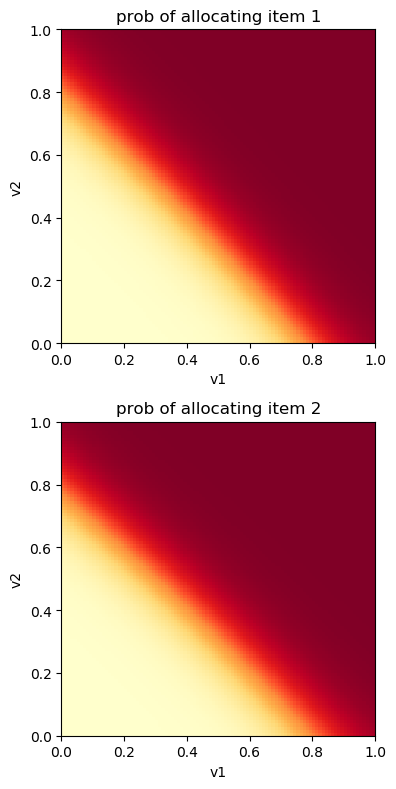

In [8]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
pu.plot_12_model(model.to(device='cpu'), 0.01, (0,1), (0,1))

In [9]:
def additive_1x2_0_1_optimal_mechanism(bids):
    import math
    allocs = torch.zeros(bids.shape)
    payments = torch.zeros((bids.shape[0], bids.shape[1]))
    for i in range(bids.shape[0]):
        if bids[i, :, 0] > (2 / 3) and bids[i, :, 1] < (2 - math.sqrt(2)) / 3:
            allocs[i, 0, :] = torch.tensor([1, 0])
            payments[i, :] = 2 / 3
        elif bids[i, :, 1] > (2 / 3) and bids[i, :, 0] < (2 - math.sqrt(2)) / 3:
            allocs[i, 0, :] = torch.tensor([0, 1])
            payments[i, :] = 2 / 3
        elif (2 - math.sqrt(2)) / 3 - bids[i, :, 0] < bids[i, 0, 1] - 2 / 3:
            allocs[i, 0, :] = torch.tensor([1, 1])
            payments[i, :] = 4 / 3 - math.sqrt(2) / 3
    return allocs, payments

In [10]:
allocs, payments = additive_1x2_0_1_optimal_mechanism(test_data)

In [11]:
payments.mean()

tensor(0.5519)